# 2 Sound

## Musical not and timbre

The folder TDSound contains the audio files recording of a single period of a Piano, Trumpet, Violin and Flute playing an A note (La in Franch).

### 2.1 Load and store the audio signal
Store amplitude and frequency.

In [1]:
# Import necessary libraries
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd

# List of necessary files to load
files = ['./TDSound/PianoLaPeriod.wav',
         './TDSound/FluteLaPeriod.wav',
         './TDSound/ViolinLaPeriod.wav',
         './TDSound/TrumpetLaPeriod.wav']

# Store sampling frequency as a float
# and amplitudes as an array of each file in:
frequencies = [0] * len(files)
amplitudes = [0] * len(files)

# For each file, store the sampling frequency and the amplitudes
for i in range(len(files)):
    amplitudes[i], frequencies[i] = sf.read(files[i], dtype='float32')   # It loads files and extracts info

# Plot the amplitudes of each file, for ensuring everything is ok
instruments = []    # List of instruments
for i in range(len(files)):
    file = files[i]
    instruments.append(file[10:-4])
    print('Sampling frequency of', instruments[i], 'file:', frequencies[i])

Sampling frequency of PianoLaPeriod file: 56490
Sampling frequency of FluteLaPeriod file: 56752
Sampling frequency of ViolinLaPeriod file: 56558
Sampling frequency of TrumpetLaPeriod file: 56544


#### Comment on the sampling frequency with regard to the Shannon-Nyquist theorem?
These are the frequencies that the recording instruments use for storing the discretized signal. These similar frequencies are above twice the highest frequency human ear can listen to. So by the Shannon-Nyquist theorem you can see that the signal is stored in a way that humans cannot distinguish if it is discretized or continous. 

### 2.2 Time interval between two values of the sound signal?
This value corresponds, on average, to the inverse of the sampling frequency so the spacing or time interval between 2 values will be:

**Note**: that the sampling frequency should not be confused with the La frequency, or the actual signal frequency.

In [2]:
spacing = []
for i in range(len(instruments)):
    spacing.append(1 / frequencies[i])

And the time array for each file:

In [3]:
times = []
for j in range(len(instruments)):
    amplitude = amplitudes[j]
    times.append([i * spacing[j] for i in range(len(amplitude))]) # in seconds

### 2.3 Plot the signal
Each instrument in subplots

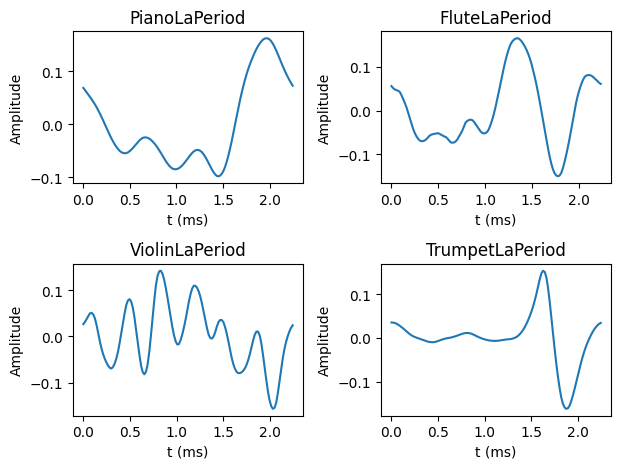

In [4]:
plt.figure(1)
for i in range(len(instruments)):
    plt.subplot(2, 2, i + 1)
    time = times[i]
    plt.plot([j * 10 ** 3 for j in time], amplitudes[i]) # time in miliseconds
    plt.title(instruments[i])
    plt.ylabel('Amplitude')
    plt.xlabel('t (ms)')

plt.tight_layout()
plt.show()


Or everything in the same plot

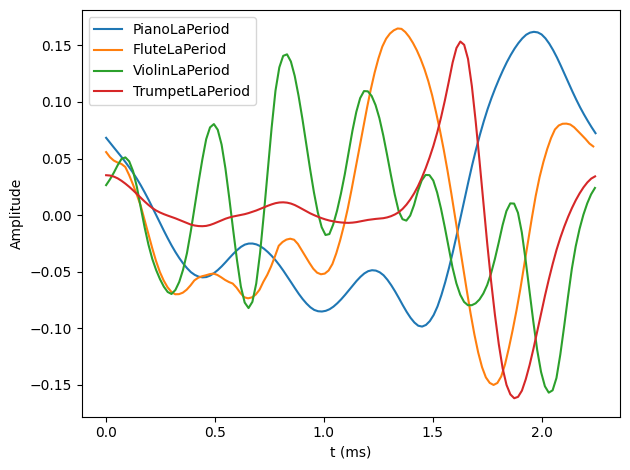

In [5]:
plt.figure(2)
for i in range(len(instruments)):
    time = times[i]
    plt.plot([j * 10 ** 3 for j in time], amplitudes[i]) # time in miliseconds
plt.ylabel('Amplitude')
plt.xlabel('t (ms)')
plt.legend(instruments)
plt.tight_layout()
plt.show()

### 2.4 Playing notes
Samples are to short to being able to listen to them. So, we repeat 1000 periods for each time step using `repeat()` and play them using `sd.play()`:

In [6]:
for i in range(len(amplitudes)):
    temp = np.asarray(amplitudes[i], dtype='float32')
    playing = np.tile(temp, 1000)
    sd.play(playing, frequencies[i])
    status = sd.wait()

## Fourier coefficients
They are **periodic** and the **number of points is equal to a power of 2**:

In [7]:
for amplitude in amplitudes:
    print(np.log2(len(amplitude)))

7.0
7.0
7.0
7.0


Specifically it is 128 points so $2^7$. Therefore, we can calculate the Fourier coefficients using the **FFT algorithm**:

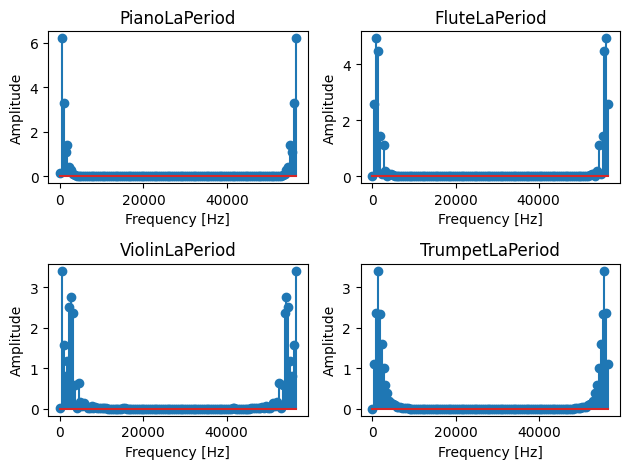

In [8]:
# 2.5 Build Fourier coefficients
coeffs = []
for i in range(len(instruments)):
    coeffs.append(np.fft.fft(amplitudes[i]).tolist())  # convert numpy array to list

# Subplots for the absolute value of Fourier coefficients
fourier_freqs = []
plt.figure(3)
for i in range(len(instruments)):
    # 2.6 Build axis
    time = times[i]
    period = time[-1]   # Signal period, as we know that the signal is 1 period
    signal_freq = 1. / period  # Signal frequency
    fourier_freq = [j * signal_freq for j in range(len(coeffs[i]))]  # Frequency in Fourier space
    fourier_freqs.append(fourier_freq)
    # 2.7 Plot Fourier spectrum
    plt.subplot(2, 2, i + 1)
    plt.stem(fourier_freq, np.abs(coeffs[i]))     # stem plot, it is better to understand the Fourier coefficients
    plt.title(instruments[i])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

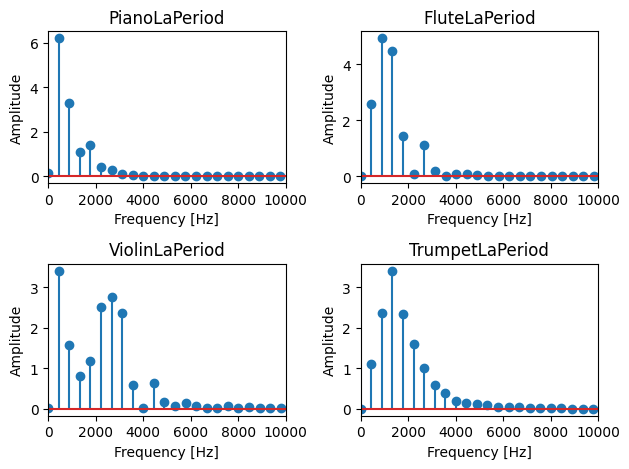

In [9]:
plt.figure(4)
for i in range(len(instruments)):
    # 2.8 Zoom for understanding
    plt.subplot(2, 2, i + 1)
    plt.stem(fourier_freqs[i], np.abs(coeffs[i]))     # stem plot, it is better to understand the Fourier coefficients
    plt.title(instruments[i])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency [Hz]')
    plt.xlim(0, 10000)
plt.tight_layout()
plt.show()

### 2.8 Comment on the graph
#### Which is the fundamental frequency?

In [10]:
for i in range(len(instruments)):
    fourier_freq = fourier_freqs[i]
    print('Fundamental frequency of', instruments[i], 'file:', fourier_freq[1])

Fundamental frequency of PianoLaPeriod file: 444.8031496062992
Fundamental frequency of FluteLaPeriod file: 446.86614173228344
Fundamental frequency of ViolinLaPeriod file: 445.33858267716533
Fundamental frequency of TrumpetLaPeriod file: 445.2283464566929


#### What is its value, and to which note does it correspond?
Its value is around **445 Hz** and it corresponds to the **La frequency**.

#### Which instrument has the most harmonics?

The one with the most harmonics is the one with the most non-zero frequencies, so it is the **trumpet** with 9 harmonics, follwed by the violin with 8.

#### Link this latter observation to your perception of the sound of the instruments.
It is why we can differentiate between instruments, which is no other thing than the timber.

#### What is the meaning of the right part of the spectrum?

The Fourier Transform is symetric. Hence, the spectrum must be symetric, however as it is a continuous signal multiplied by a Dirac comb, we obtain a summation of the signal Fourier Transform several times. As negative frequencies do not exist we see the half positive ones, and the other half from the following Fourier Transform sum.

#### Is the Shannon-Nyquist criterion respected for the four sound samples?

Yes, no frequency is greater than the sampling frequency, as we expected.

In [11]:
for i in range(len(instruments)):
    fourier_freq = fourier_freqs[i]
    print('Fundamental frequency of', instruments[i], 'file:', fourier_freq[-1])

Fundamental frequency of PianoLaPeriod file: 56490.0
Fundamental frequency of FluteLaPeriod file: 56752.0
Fundamental frequency of ViolinLaPeriod file: 56558.0
Fundamental frequency of TrumpetLaPeriod file: 56544.0
